In [82]:
# !pipenv install matplotlib cartopy
# !pipenv install geopandas
# !pipenv install os PIL numpy
# !pipenv install pycountry
# !pipenv install plotly

Installing plotly...
Resolving plotly...
[    ] Installing...
Installation Succeeded
[    ] Installing plotly...
[    ] Installing plotly...

Installing nbformat...
Resolving nbformat...
[    ] Installing...
Added nbformat to Pipfile's [packages] ...
[    ] Installing nbformat...
Installation Succeeded
[    ] Installing nbformat...
[    ] Installing nbformat...

Building requirements...
[    ] Locking...
Resolving dependencies...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[  ==] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[=== ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[   =] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[=== ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[  ==] L

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Pipfile.lock (8b83dd) out of date, updating to (4412b0)...
Locking [packages] dependencies...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (724528afda8d70dc539784d59e3c44a32068d5f0079417f291a7921caa4412b0)!


In [1]:
import os
from PIL import Image
import numpy as np
import pycountry
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import pandas as pd
import plotly

In [3]:
# Define the path to the folder containing the flag images
folder_path = 'w2560'  # Update this path

# Initialize an empty dictionary to store the average RGB values
avg_rgb_values = {}

# Custom mapping for ISO 3166-2:GB codes to "United Kingdom"
gb_subdivisions_to_country = {
    'GB-ENG': 'United Kingdom',
    'GB-SCT': 'United Kingdom',
    'GB-WLS': 'United Kingdom',
    'GB-NIR': 'United Kingdom'
    # Add other subdivisions if necessary
}

# Create an ISO-2 to ISO-3 dictionary
df = pd.read_csv('countries-ISO-2-3-numeric.csv', delimiter='\t',keep_default_na=False)
# Create a dictionary mapping from Alpha-2 to Alpha-3
alpha2_to_alpha3 = df.set_index('ISO-2')['ISO-3'].to_dict()
for iso2gb, _ in gb_subdivisions_to_country.items():
    alpha2_to_alpha3[iso2gb.upper()] = 'GBR'

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
        # Extract the country code from the filename
        country_code = filename.split('.')[0].upper()

        # Map ISO 3166-2:GB codes to "United Kingdom", otherwise use pycountry
        # if country_code in gb_subdivisions_to_country:
        #     country_name = gb_subdivisions_to_country[country_code]
        # else:
        #     country = pycountry.countries.get(alpha_2=country_code)
        #     country_name = country.name if country else 'Unknown'

        # Convert to ISO-3 (we'll call it country_name because a previous approach used pycountry to turn it into the actual name of the country)
        country_name = alpha2_to_alpha3[country_code.upper()]

        # Load the image and calculate the average RGB value
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path).convert('RGB')
        np_img = np.array(img)
        avg_rgb = np.mean(np_img, axis=(0, 1))

        # Round the RGB values to the nearest whole number
        avg_rgb = np.round(avg_rgb).astype(int)

        # Store the average RGB value in the dictionary using the country name
        avg_rgb_values[country_name] = avg_rgb

avg_rgb_values

c:\Users\kaewin\.virtualenvs\flags-Jvqzl00k\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


{'AND': array([159,  74,  75]),
 'ARE': array([127,  92,  75]),
 'AFG': array([80, 72, 46]),
 'ATG': array([136,  52,  61]),
 'AIA': array([ 60,  65, 118]),
 'ALB': array([224,   0,   0]),
 'ARM': array([153,  73,  59]),
 'AGO': array([110,  13,  23]),
 'ATA': array([ 81, 189, 230]),
 'ARG': array([161, 197, 229]),
 'ASM': array([111,  90, 140]),
 'AUT': array([218,  96, 116]),
 'AUS': array([ 52,  56, 117]),
 'ABW': array([ 89, 150, 196]),
 'ALA': array([103, 111, 103]),
 'AZE': array([107, 133, 116]),
 'BIH': array([ 74,  86, 116]),
 'BRB': array([75, 84, 96]),
 'BGD': array([51, 93, 75]),
 'BEL': array([164,  90,  34]),
 'BFA': array([122,  96,  50]),
 'BGR': array([156, 148, 128]),
 'BHR': array([230, 111, 102]),
 'BDI': array([173, 154, 117]),
 'BEN': array([145, 122,  52]),
 'BLM': array([228, 220, 213]),
 'BMU': array([188,  57,  81]),
 'BRN': array([202, 179,  70]),
 'BOL': array([146, 119,  41]),
 'BES': array([120, 137, 163]),
 'BRA': array([ 48, 154,  57]),
 'BHS': array([ 5

C:\Users\kaewin\AppData\Local\Temp\ipykernel_23176\4074401793.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



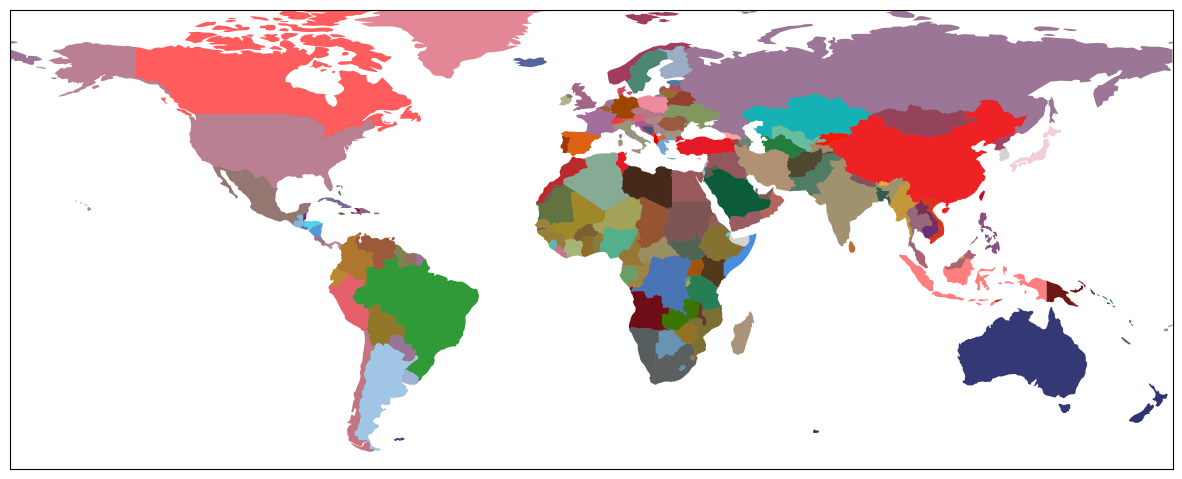

In [10]:
# Convert RGB tuples to matplotlib color format
country_colors = {country: [rgb[0]/255, rgb[1]/255, rgb[2]/255] for country, rgb in avg_rgb_values.items()}

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure and axis with cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=.5)
ax.set_extent([-150, 60, -25, 60])

# Plot each country in the world with the specified color
for country in world.iterrows():
    country_name = country[1]['iso_a3']
    if country_name in country_colors:
        color = country_colors[country_name]
    else:
        color = 'lightgrey'  # Default color for countries not in the dictionary
    
    ax.add_geometries([country[1]['geometry']], ccrs.PlateCarree(),
                      facecolor=color, label=country_name)

plt.show()